## Predicting Survival on the Titanic using Logistic Regression
 

My model will use the independent variables class, sex, age sibsp, and parch to predict the dependent variable survived.  

In [6]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
#reading the data from the disk into memory
df = pd.read_csv("C:\\Users\\TVita\\Documents\\GitHub\\Data-Science-Essentials\\Titanic EDA\\train.csv")

In [9]:
#Just a reminder, here are all the column names
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [37]:
# create a new dataframe and put only these variables I'm going to be using into it.
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['survived'] = df['Survived']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']

In [40]:
#Get dummies so now female = 1, male = 0
X['sex'] = pd.get_dummies(X.sex)['female']

getting average age based on class sibsp and other ages that share similar traits

In [92]:
X.age[(X.sibsp > 2) & (X.age < 18) & (X.sex == 1)].mean()

8.0

In [93]:
X.age[(X.sibsp > 2) & (X.age < 18) & (X.sex == 0)].mean()

6.7368421052631575

In [70]:
X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()

23.849056603773583

In [71]:
X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()

28.816666666666666

In [72]:
X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()

32.107142857142854

In [73]:
X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()

33.63125

In [74]:
X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()

36.285714285714285

In [75]:
X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()

42.506410256410255

In [78]:
#Setting average age of null ages based on class sibsp and other ages that share similar traits

female_P3_no_parch = X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()
male_P3_no_parch = X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()


female_P2_no_parch = X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()
male_P2_no_parch = X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()


female_P1_no_parch = X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull() == False)].mean()
male_P1_no_parch = X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull() == False)].mean()

In [95]:

female_children = X.age[(X.sibsp > 2) & (X.age < 18) & (X.sex == 1)].mean()
male_children = X.age[(X.sibsp > 2) & (X.age < 18) & (X.sex == 0)].mean()

In [85]:
X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull())] = female_P3_no_parch
X.age[(X.pclass == 3) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull())] = male_P3_no_parch

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [84]:
X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull())] = female_P2_no_parch 
X.age[(X.pclass == 2) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull())] = male_P2_no_parch 

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [82]:
X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 0) & (X.age.isnull())] = male_P1_no_parch
X.age[(X.pclass == 1) & (X.sibsp < 3) & (X.parch == 0) & (X.sex == 1) & (X.age.isnull())] = female_P1_no_parch

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [96]:
X[(X.age.isnull())]

,sex,age,survived,pclass,sibsp,parch
65,0,NaN,1,3,1,1
128,1,NaN,1,3,1,1
140,1,NaN,0,3,0,2
159,0,NaN,0,3,8,2
166,1,NaN,1,1,0,1
176,0,NaN,0,3,3,1
180,1,NaN,0,3,8,2
201,0,NaN,0,3,8,2
229,1,NaN,0,3,3,1
324,0,NaN,0,3,8,2


In [99]:
#at this point only a few null ages are left and very few outside of the spectrum above for children and adults. I will assume 
#all remaining null ages are children
X.age[(X.age.isnull()) & (X.sex == 1)] = female_children
X.age[(X.age.isnull()) & (X.sex == 0)] = male_children

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [100]:
X[(X.age.isnull())]

,sex,age,survived,pclass,sibsp,parch


In [101]:
#survived will be my dependent variable, y.   I'll assign it to y and remove it from X
y = X['survived']
X = X.drop(['survived'], axis=1)

In [102]:
X

,sex,age,pclass,sibsp,parch
0,0,22.000000,3,1,0
1,1,38.000000,1,1,0
2,1,26.000000,3,0,0
3,1,35.000000,1,1,0
4,0,35.000000,3,0,0
5,0,28.816667,3,0,0
6,0,54.000000,1,0,0
7,0,2.000000,3,3,1
8,1,27.000000,3,0,2
9,1,14.000000,2,1,0


In [134]:
#remember to scale our features, as with linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [135]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Creation
At this point I have a test and train set defined.  I will use train to train my model and test to see how accurate the model is.

There's one problem with that though.   Lets say my model is right 70% of the time.   Is that good?  Maybe?   

I'm going to build a simple 'base rate' model to compare my logistic model to, so we can see if our logistic model is useful or not.  

Then, I'll build my logistic model.


####Base Rate Model
For my baserate model, I'm going to predict that everyone dies.

In [136]:
#This function looks for females in the test set and returns 1, survived, otherwise it returns 0
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y
    

In [137]:
#how accurate is my base rate model?
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print "Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate)

Base rate accuracy is 0.59


my base model is 59% correct

In [138]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [139]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.82


### Model Comparison

Our base model wasn't very good, but it looked better than it was because of class imbalance.  There are many more 0s than 1s in our dataset, so if we just guess 0 we can 'cheat.'

A better metric for binary classifer comparisons is AUC or area under the curve. 

Closely related is [precision and recall](http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html).

Precision is the fraction of correctly identified examples of a class (ratio of true positives to all positives).

Recall is the fraction of observastions classified in that class that was correctly classified.  

Think of fishing with a net for tuna.   
*  If our net is very precise, and has high recall it will catch any and all tuna and ONLY tuna.
*  If our net is very precise, but has low recall then we might catch one tuna, but most will escape.
*  If our net is low precision, but has high recall, then we might catch tuna, but also any other fish around
*  If our net is low precision, and low recall, then we should probably give up fishing.   


In [141]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report



In [142]:
print "---Base Model---"
#base rate AUC
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print "Base Rate AUC = %2.2f" % base_roc_auc
print classification_report(y_test,base_rate_model(X_test) )
print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.59      1.00      0.74       105
          1       0.00      0.00      0.00        74

avg / total       0.34      0.59      0.43       179



---Logistic Model---
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.83      0.88      0.85       105
          1       0.81      0.74      0.77        74

avg / total       0.82      0.82      0.82       179



C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [143]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

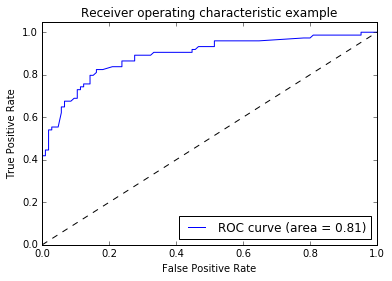

In [144]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()